<a href="https://colab.research.google.com/github/Mubassir1820/Kaggle_competition/blob/Advanced-regression/Kaggle_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# For local run
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# For Kaggle run
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Extract target column, the SalePrice
target = train.columns.to_list()[-1]
train_target = train[target]

# Extract Id column, then drop it
train_id = train['UID']
test_id = test['UID']
train.drop('UID', axis=1, inplace=True)
test.drop('UID', axis=1, inplace=True)

# Set random seed
random_seed = 1

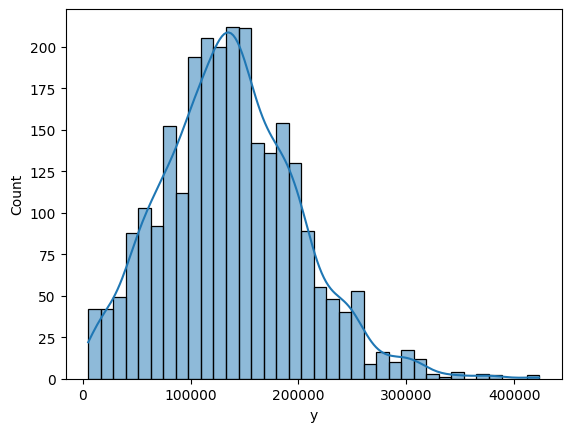

Skewness:  0.4443
Kurtosis:  0.4873


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.histplot(train[target], kde=True)
plt.show()
print('Skewness: ', f'{train[target].skew():.4f}')
print('Kurtosis: ', f'{train[target].kurt():.4f}')

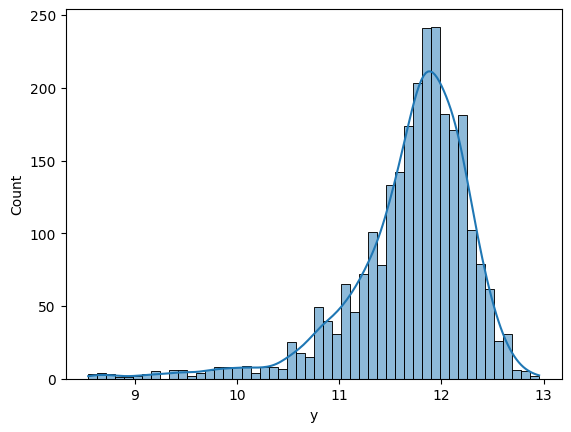

Skewness:  -1.6665
Kurtosis:  4.4123


In [43]:
# Convert target column to log1p, for lower skewness and better performance
train_target = np.log1p(train_target)
train.drop(target, axis=1, inplace=True)
sns.histplot(train_target, kde=True)
plt.show()
print('Skewness: ', f'{train_target.skew():.4f}')
print('Kurtosis: ', f'{train_target.kurt():.4f}')

In [44]:
# Combine train and test data into one dataframe
combined = pd.concat([train, test], axis=0)

In [45]:
combined.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,A 0,B0,C2,D1,100,E1,F2
1,A1,B0,C11,D4,100,E4,F2
2,A0,B0,C18,D0,0,E0,F2
3,A2,B0,C11,D1,100,E1,F2
4,A0,B0,C67,D1,0,E1,F2
5,A0,B0,C11,D1,100,E1,F2
6,AO,B0,C11,D1,100,E1,F0
7,A0,B0,C4,D1,0,E1,F2
8,A0,B0,C2,D1,100,E1,F2
9,A0,B0,C2,D1,100,E1,F2


In [46]:
combined.shape

(3755, 7)

In [47]:
combined['col_0'].value_counts()

A0        2160
A1         691
A2         275
A3          98
 A0         70
A 0         56
AO          50
A0          49
A 1         26
 A1         21
A1          20
 A2          9
A 2          9
A2           6
 A3          4
A 3          3
A   3        2
Name: col_0, dtype: int64

In [48]:
combined['col_1'].value_counts()

B0        3396
 B0         61
B 0         50
B0          48
BO          44
B3          16
B2           9
B1           9
B   3        1
B1           1
Name: col_1, dtype: int64

In [49]:
combined['col_2'].value_counts()

C11    1040
C2      840
C4      612
C9      289
C7      103
       ... 
C86       1
C81       1
C22       1
C48       1
C32       1
Name: col_2, Length: 93, dtype: int64

In [50]:
combined['col_3'].value_counts()

D1     3004
D4      167
D2       85
D0       80
D6       71
       ... 
D75       1
D66       1
D77       1
D38       1
D70       1
Name: col_3, Length: 78, dtype: int64

In [51]:
combined['col_5'].value_counts()

E1     3040
E4      172
E2       87
E0       77
E6       58
       ... 
E34       1
E30       1
E28       1
E7        1
E66       1
Name: col_5, Length: 72, dtype: int64

In [52]:
combined['col_6'].value_counts()

F2        2842
F0         409
F1         133
F2          59
F 2         59
 F2         53
 F0         13
F 0          9
F0           7
FO           4
F 1          4
F1           2
 F1          1
Name: col_6, dtype: int64

In [53]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 1126
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col_0   3549 non-null   object
 1   col_1   3635 non-null   object
 2   col_2   3755 non-null   object
 3   col_3   3755 non-null   object
 4   col_4   3755 non-null   int64 
 5   col_5   3755 non-null   object
 6   col_6   3595 non-null   object
dtypes: int64(1), object(6)
memory usage: 234.7+ KB


In [54]:
combined.describe()

,col_4
count,3755.000000
mean,46.271638
std,48.589050
min,0.000000
25%,0.000000
50%,0.000000
75%,100.000000
max,100.000000


In [55]:
combined.value_counts()

col_0  col_1  col_2  col_3  col_4  col_5  col_6
A0     B0     C11    D1     0      E1     F2       259
              C2     D1     100    E1     F2       191
              C11    D1     100    E1     F2       187
              C2     D1     0      E1     F2       186
              C4     D1     0      E1     F2       124
                                                  ... 
              C9     D8     100    E1     F2         1
              C90    D1     100    E1     F0         1
                                          F2         1
              C92    D4     50     E4     F0         1
AO     B0     C51    D1     0      E1     F2         1
Length: 1029, dtype: int64

In [56]:
combined.isnull().sum()


col_0    206
col_1    120
col_2      0
col_3      0
col_4      0
col_5      0
col_6    160
dtype: int64

In [57]:
# Replace the missing values with mode
combined['col_0'].fillna(combined['col_0'].mode()[0], inplace=True)
combined['col_1'].fillna(combined['col_1'].mode()[0], inplace=True)
combined['col_6'].fillna(combined['col_6'].mode()[0], inplace=True)

In [58]:
combined.isnull().sum()

col_0    0
col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
col_6    0
dtype: int64

In [59]:
# Regular expression to clean the data
import re

def preprocess(text):
  text = re.sub('[a-z^\s]','',text)
  return text

In [60]:
combined['col_0'] = combined['col_0'].map(preprocess)

In [61]:
combined['col_0'].value_counts()

A0    2541
A1     758
A2     299
A3     107
AO      50
Name: col_0, dtype: int64

In [62]:
combined['col_1'] = combined['col_1'].map(preprocess)

In [63]:
combined['col_1'].value_counts()

B0    3675
BO      44
B3      17
B1      10
B2       9
Name: col_1, dtype: int64

In [64]:
combined['col_6'] = combined['col_6'].map(preprocess)

In [65]:
combined['col_6'].value_counts()

F2    3173
F0     438
F1     140
FO       4
Name: col_6, dtype: int64

In [66]:
combined.head(10)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,A0,B0,C2,D1,100,E1,F2
1,A1,B0,C11,D4,100,E4,F2
2,A0,B0,C18,D0,0,E0,F2
3,A2,B0,C11,D1,100,E1,F2
4,A0,B0,C67,D1,0,E1,F2
5,A0,B0,C11,D1,100,E1,F2
6,AO,B0,C11,D1,100,E1,F0
7,A0,B0,C4,D1,0,E1,F2
8,A0,B0,C2,D1,100,E1,F2
9,A0,B0,C2,D1,100,E1,F2


In [ ]:
# Count encoding of column 2, 3 , 5, 6, 0, 1
count_encoding1 = df['col_2'].value_counts().to_dict()
combined['col_2_count_encoded'] = df['col_2'].map(count_encoding1)

count_encoding2 = df['col_3'].value_counts().to_dict()
df['col_3_count_encoded'] = df['col_3'].map(count_encoding2)

count_encoding3 = df['col_5'].value_counts().to_dict()
df['col_5_count_encoded'] = df['col_5'].map(count_encoding3)

count_encoding4 = df['col_0'].value_counts().to_dict()
df['col_0_count_encoded'] = df['col_0'].map(count_encoding4)

count_encoding5 = df['col_1'].value_counts().to_dict()
df['col_1_count_encoded'] = df['col_1'].map(count_encoding5)

count_encoding6 = df['col_6'].value_counts().to_dict()
df['col_6_count_encoded'] = df['col_6'].map(count_encoding6)

In [ ]:
df.head()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,y,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,0,A0,B0,C2,D1,100,E1,F2,237000,587,2093,2120,1782,2575,2216
1,1,A1,B0,C11,D4,100,E4,F2,86193,728,116,121,542,2575,2216
2,2,A0,B0,C18,D0,0,E0,F2,169200,59,61,57,1782,2575,2216
3,3,A2,B0,C11,D1,100,E1,F2,58000,728,2093,2120,195,2575,2216
4,4,A0,B0,C67,D1,0,E1,F2,235000,7,2093,2120,1782,2575,2216


In [ ]:
# Drop the uid column
columns_to_drop = ['UID', 'y', 'col_2', 'col_3', 'col_5','col_0', 'col_1', 'col_6']
X = df.drop(columns = columns_to_drop)

In [ ]:
X.head()

,col_4,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,100,587,2093,2120,1782,2575,2216
1,100,728,116,121,542,2575,2216
2,0,59,61,57,1782,2575,2216
3,100,728,2093,2120,195,2575,2216
4,0,7,2093,2120,1782,2575,2216


In [ ]:
X.shape

(2628, 7)

In [ ]:
y = df['y'].values

In [ ]:
# Dataset splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=100,   # Number of trees (boosting rounds)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of each tree
    random_state=42     # Seed for reproducibility
)

model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
#make prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2371914201.3918076
Root Mean Squared Error: 48702.30180794135
R-squared: 0.40769249627282644


In [ ]:
#Hyperparameter tuning and cross validation
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Prediction on test data
test_data = pd.read_csv('test.csv')
test_data.head()

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,A0,B0,C11,D1,100,E1,F2
1,2629,A0,B0,C11,D1,0,E1,F2
2,2630,A0,B0,C11,D1,100,E1,F2
3,2631,A0,B0,C26,D1,100,E1,F0
4,2632,A0,B0,C11,D1,100,E1,NaN


In [ ]:
test_data.isnull().sum()

UID       0
col_0    67
col_1    34
col_2     0
col_3     0
col_4     0
col_5     0
col_6    48
dtype: int64

In [ ]:
# Replace the missing values with mode
test_data['col_0'].fillna(test_data['col_0'].mode()[0], inplace=True)
test_data['col_1'].fillna(test_data['col_1'].mode()[0], inplace=True)
test_data['col_6'].fillna(test_data['col_6'].mode()[0], inplace=True)

In [ ]:
test_data.isnull().sum()

UID      0
col_0    0
col_1    0
col_2    0
col_3    0
col_4    0
col_5    0
col_6    0
dtype: int64

In [ ]:
test_data.shape, df.shape

((1127, 8), (2628, 15))

In [ ]:
test_data['col_0'].value_counts()

A0        710
A1        202
A2         97
A3         31
A 0        18
 A0        17
AO         14
A0         14
 A1         5
A 1         5
A1          4
A 2         3
A2          2
A 3         2
 A2         2
A   3       1
Name: col_0, dtype: int64

In [ ]:
test_data['col_1'].value_counts()

B0        1055
B 0         17
BO          15
B0          15
 B0         13
B3           6
B1           4
B2           2
Name: col_1, dtype: int64

In [ ]:
test_data['col_2'].value_counts()

C11    312
C2     253
C4     196
C9      85
C7      27
C15     24
C18     23
C26     20
C3      14
C6      11
C50     10
C1       9
C19      9
C27      9
C34      8
C36      7
C20      5
C12      5
C47      5
C33      4
C25      4
C49      4
C42      4
C53      4
C38      4
C29      4
C84      3
C69      3
C87      3
C66      3
C45      3
C57      3
C39      3
C46      3
C65      3
C78      3
C54      3
C30      3
C72      3
C0       2
C85      2
C52      2
C13      2
C28      2
C73      2
C21      2
C56      2
C17      2
C44      1
C63      1
C41      1
C5       1
C32      1
C59      1
C70      1
C76      1
C35      1
C8       1
Name: col_2, dtype: int64

In [ ]:
test_data['col_3'].value_counts()

D1     911
D4      51
D2      25
D0      19
D6      17
D12     15
D3      14
D8       8
D37      6
D41      5
D13      5
D9       4
D33      4
D26      3
D16      3
D64      3
D19      2
D25      2
D39      2
D57      2
D24      1
D17      1
D5       1
D11      1
D23      1
D42      1
D20      1
D61      1
D10      1
D22      1
D45      1
D63      1
D18      1
D29      1
D52      1
D62      1
D74      1
D55      1
D15      1
D48      1
D69      1
D43      1
D46      1
D44      1
D67      1
D70      1
Name: col_3, dtype: int64

In [ ]:
test_data['col_4'].value_counts()

0      580
100    494
50      53
Name: col_4, dtype: int64

In [ ]:
test_data['col_5'].value_counts()

E1     920
E4      51
E2      25
E0      20
E3      18
E6      14
E11     13
E24      7
E33      6
E19      6
E14      3
E23      3
E64      3
E8       3
E44      2
E35      2
E42      2
E22      2
E49      2
E37      2
E9       2
E5       1
E25      1
E21      1
E10      1
E38      1
E17      1
E58      1
E20      1
E13      1
E15      1
E16      1
E60      1
E68      1
E55      1
E53      1
E48      1
E65      1
E39      1
E43      1
E51      1
E66      1
Name: col_5, dtype: int64

In [ ]:
test_data['col_6'].value_counts()

F2        914
F0        123
F1         36
F2         16
 F2        14
F 2        13
 F0         7
F 0         3
F 1         1
Name: col_6, dtype: int64

In [ ]:
# preprocess with the function preprocess
test_data['col_0'] = test_data['col_0'].map(preprocess)

In [ ]:
test_data['col_0'].value_counts()

A0    759
A1    216
A2    104
A3     34
AO     14
Name: col_0, dtype: int64

In [ ]:
test_data['col_1'] = test_data['col_1'].map(preprocess)

In [ ]:
test_data['col_1'].value_counts()

B0    1100
BO      15
B3       6
B1       4
B2       2
Name: col_1, dtype: int64

In [ ]:
test_data['col_6'] = test_data['col_6'].map(preprocess)

In [ ]:
test_data['col_6'].value_counts()

F2    957
F0    133
F1     37
Name: col_6, dtype: int64

In [ ]:
# Encoding the categorical variables using one hot and count encoding
# test_data = pd.get_dummies(test_data, columns = ['col_0','col_1','col_6'])

In [ ]:
test_data

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6
0,2628,A0,B0,C11,D1,100,E1,F2
1,2629,A0,B0,C11,D1,0,E1,F2
2,2630,A0,B0,C11,D1,100,E1,F2
3,2631,A0,B0,C26,D1,100,E1,F0
4,2632,A0,B0,C11,D1,100,E1,F2
...,...,...,...,...,...,...,...,...
1122,3750,A0,B0,C4,D1,100,E1,F2
1123,3751,A1,B0,C34,D1,0,E1,F2
1124,3752,A2,B0,C4,D1,0,E1,F2
1125,3753,A0,B0,C2,D1,100,E1,F2


In [ ]:
# Count encoding of column 2, 3 , 5
count_encoding1 = test_data['col_2'].value_counts().to_dict()
test_data['col_2_count_encoded'] = test_data['col_2'].map(count_encoding1)

count_encoding2 = test_data['col_3'].value_counts().to_dict()
test_data['col_3_count_encoded'] = test_data['col_3'].map(count_encoding2)

count_encoding3 = test_data['col_5'].value_counts().to_dict()
test_data['col_5_count_encoded'] = test_data['col_5'].map(count_encoding3)

count_encoding4 = test_data['col_0'].value_counts().to_dict()
test_data['col_0_count_encoded'] = test_data['col_0'].map(count_encoding4)

count_encoding5 = test_data['col_1'].value_counts().to_dict()
test_data['col_1_count_encoded'] = test_data['col_1'].map(count_encoding5)

count_encoding6 = test_data['col_6'].value_counts().to_dict()
test_data['col_6_count_encoded'] = test_data['col_6'].map(count_encoding6)

In [ ]:
test_data

,UID,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,2628,A0,B0,C11,D1,100,E1,F2,312,911,920,759,1100,957
1,2629,A0,B0,C11,D1,0,E1,F2,312,911,920,759,1100,957
2,2630,A0,B0,C11,D1,100,E1,F2,312,911,920,759,1100,957
3,2631,A0,B0,C26,D1,100,E1,F0,20,911,920,759,1100,133
4,2632,A0,B0,C11,D1,100,E1,F2,312,911,920,759,1100,957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,3750,A0,B0,C4,D1,100,E1,F2,196,911,920,759,1100,957
1123,3751,A1,B0,C34,D1,0,E1,F2,8,911,920,216,1100,957
1124,3752,A2,B0,C4,D1,0,E1,F2,196,911,920,104,1100,957
1125,3753,A0,B0,C2,D1,100,E1,F2,253,911,920,759,1100,957


In [ ]:
test = test_data.drop(columns = ['UID','col_2','col_3','col_5', 'col_0', 'col_1', 'col_6'])

In [ ]:
test

,col_4,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,100,312,911,920,759,1100,957
1,0,312,911,920,759,1100,957
2,100,312,911,920,759,1100,957
3,100,20,911,920,759,1100,133
4,100,312,911,920,759,1100,957
...,...,...,...,...,...,...,...
1122,100,196,911,920,759,1100,957
1123,0,8,911,920,216,1100,957
1124,0,196,911,920,104,1100,957
1125,100,253,911,920,759,1100,957


In [ ]:
X

,col_4,col_2_count_encoded,col_3_count_encoded,col_5_count_encoded,col_0_count_encoded,col_1_count_encoded,col_6_count_encoded
0,100,587,2093,2120,1782,2575,2216
1,100,728,116,121,542,2575,2216
2,0,59,61,57,1782,2575,2216
3,100,728,2093,2120,195,2575,2216
4,0,7,2093,2120,1782,2575,2216
...,...,...,...,...,...,...,...
2623,0,587,2093,2120,542,2575,2216
2624,0,3,2093,2120,1782,2575,2216
2625,100,76,2093,2120,1782,29,2216
2626,100,728,2093,2120,1782,2575,2216


In [ ]:
predictions = model.predict(test)

In [ ]:
submission = test_data[['UID']]
submission

,UID
0,2628
1,2629
2,2630
3,2631
4,2632
...,...
1122,3750
1123,3751
1124,3752
1125,3753


In [ ]:
submission['y'] = predictions

<ipython-input-68-90bde1067105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['y'] = predictions


In [ ]:
submission

,UID,y
0,2628,157145.234375
1,2629,156234.359375
2,2630,157145.234375
3,2631,157145.234375
4,2632,157145.234375
...,...,...
1122,3750,157145.234375
1123,3751,156234.359375
1124,3752,156234.359375
1125,3753,157145.234375


In [ ]:
submission.to_csv('sample_submission1.csv', index = None)

In [ ]:
pd.read_csv('sample_submission1.csv')

,UID,y
0,2628,157145.23
1,2629,156234.36
2,2630,157145.23
3,2631,157145.23
4,2632,157145.23
...,...,...
1122,3750,157145.23
1123,3751,156234.36
1124,3752,156234.36
1125,3753,157145.23
